#📊 Gráficos do Projeto – Incidente do Lote 404.



1️⃣ Gráfico 1 — Evolução da Temperatura da MP-02 (Digestor).



🎯 Objetivo:

Mostrar que a falha não foi pontual, mas resultado de uma tendência de degradação térmica.

📌 Código:



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_maquinas = pd.read_json('/content/dados_maquinas.json')

In [7]:
# Filtrar máquina MP-02
mp02 = df_maquinas[df_maquinas["id"] == 2].iloc[0]

In [8]:
# Criar DataFrame do histórico
hist_mp02 = pd.DataFrame(mp02["historico"])
hist_mp02["data"] = pd.to_datetime(hist_mp02["data"])

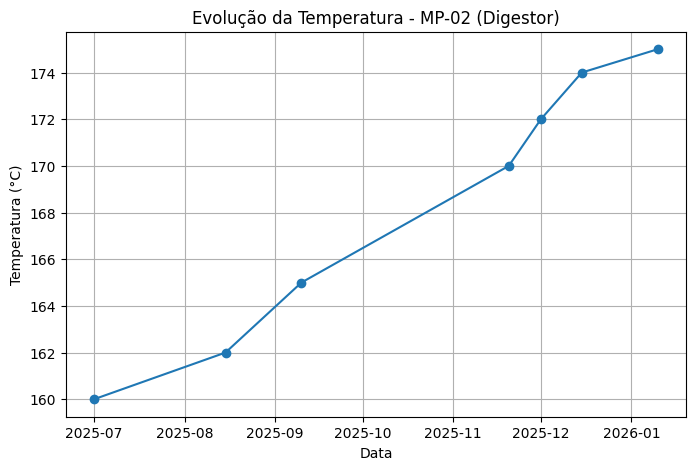

In [9]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(hist_mp02["data"], hist_mp02["temp"], marker="o")
plt.title("Evolução da Temperatura - MP-02 (Digestor)")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

🧠 Insight gerado:

•	Tendência crescente contínua.

•	Pico de 175°C no dia do incidente.

•	Evidência clara de ausência de manutenção preventiva.


2️⃣ Gráfico 2 — Nível da Soda Cáustica ao Longo do Tempo.

🎯 Objetivo:

Demonstrar a queda progressiva do insumo crítico, reforçando a causa técnica do problema.

📌 Código:


In [12]:
df_insumos = pd.read_json('/content/dados_insumos.json')

In [13]:
# Filtrar Soda Cáustica
soda = df_insumos[df_insumos["nome"] == "Soda Cáustica"].iloc[0]

In [14]:
hist_soda = pd.DataFrame(soda["historico"])
hist_soda["data"] = pd.to_datetime(hist_soda["data"])

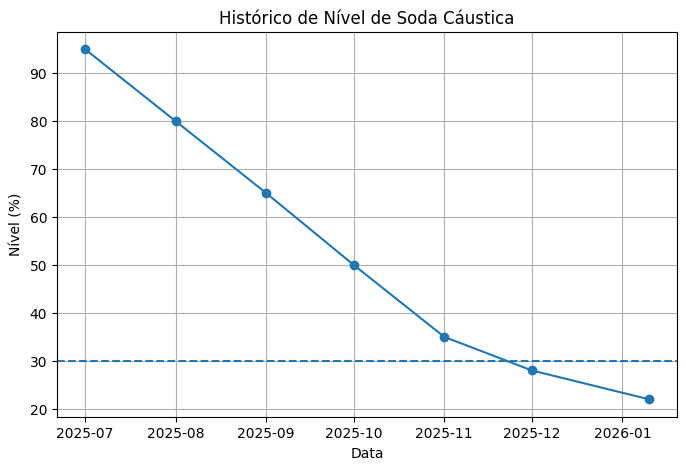

In [15]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(hist_soda["data"], hist_soda["pct"], marker="o")
plt.axhline(30, linestyle="--")  # Limite crítico ilustrativo
plt.title("Histórico de Nível de Soda Cáustica")
plt.xlabel("Data")
plt.ylabel("Nível (%)")
plt.grid(True)
plt.show()


🧠 Insight gerado:

•	Queda constante e sem correção.

•	Entrada em zona crítica (<30%).

•	Falta de ação preventiva antes do colapso.



3️⃣ Gráfico 3 — Produção da MP-02 vs Temperatura.

🎯 Objetivo:

Mostrar o impacto direto do superaquecimento na produtividade.

📌 Código:


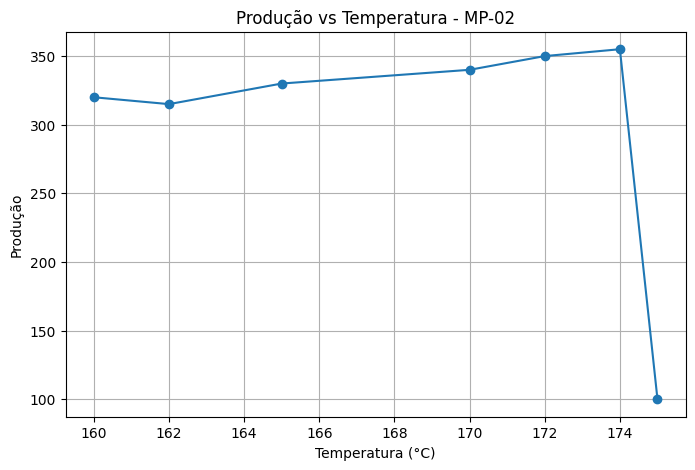

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(hist_mp02["temp"], hist_mp02["producao"], marker="o")
plt.title("Produção vs Temperatura - MP-02")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Produção")
plt.grid(True)
plt.show()


🧠 Insight gerado:

•	Quanto maior a temperatura, menor a produção.

•	Evidência de instabilidade operacional.

•	Justifica tecnicamente a devolução do lote.


4️⃣ Gráfico 4 — Ocorrências Operacionais por Máquina:

🎯 Objetivo:

Identificar rapidamente qual máquina concentra mais problemas.

📌 Código:

In [18]:
df_turnos = pd.read_json('/content/dados_turnos.json')

In [19]:
# Contar ocorrências por máquina.
ocorrencias = df_turnos.groupby("maq")["obs"].count()

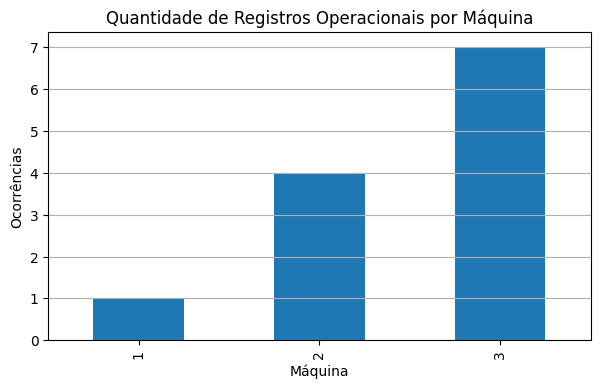

In [20]:
plt.figure(figsize=(7, 4))
ocorrencias.plot(kind="bar")
plt.title("Quantidade de Registros Operacionais por Máquina")
plt.xlabel("Máquina")
plt.ylabel("Ocorrências")
plt.grid(axis="y")
plt.show()


🧠 Insight gerado:

•	MP-02 aparece com maior concentração de registros.

•	Reforça o foco correto da investigação.


Foram utilizados gráficos de linha para análise temporal de temperatura e insumos críticos, permitindo identificar tendências de degradação operacional.

A visualização cruzada de temperatura e produção evidenciou o impacto direto do superaquecimento no desempenho da máquina MP-02, reforçando a análise de causa raiz do incidente.
